<h1>Fashion-MNIST Project </h1>

<p>In this project,  I have classified  Fashion-MNIST dataset using convolutional neural networks.</p>

<h2 id="Preparation" >Preparation</h2>

Downloaded the datasets needed for this lab.

In [1]:
!pip install torch
!pip install torchvision

In [2]:
# PyTorch Modules needed for this lab

from torch.utils.data import Dataset, DataLoader
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

In [3]:
# Other non-PyTorch Modules
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

In [4]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(Image_size, Image_size), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

<h2>Created a Dataset Class</h2>

In [5]:
Image_size = 16
composed = transforms.Compose([transforms.Resize((Image_size,Image_size)),transforms.ToTensor()])

<hr>

Created two dataset objects for the Fashion MNIST  dataset. One for training data called <code> dataset_train </code> and one for validation data <code>dataset_val</code>.

In [6]:
dataset_train = dsets.FashionMNIST(root='.fashion/data', train = True, transform = composed, download = True)
dataset_val = dsets.FashionMNIST(root = '.fashion/data', train = False, transform = composed, download = True)

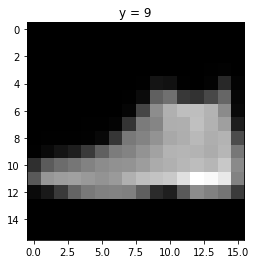

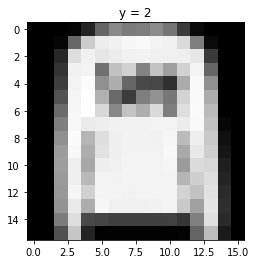

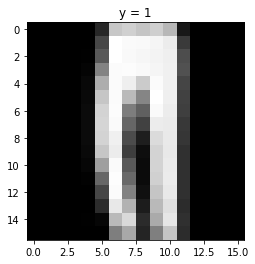

In [7]:
for n,data_sample in enumerate(dataset_val):

    show_data(data_sample)
    plt.show()
    if n==2:
        break 

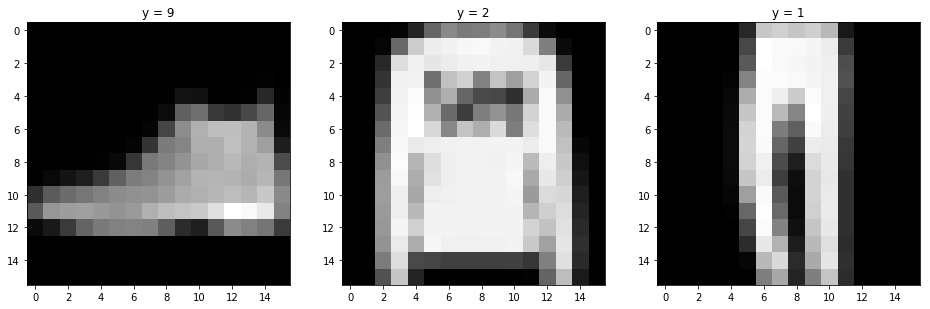

In [8]:
# Just for screenshot(To put all three Images in a single row)

f, ax = plt.subplots(1,3,figsize=(16,16))
for n in range(3):
    ax[n].imshow(dataset_val[n][0].numpy().reshape(Image_size, Image_size), cmap='gray')
    ax[n].set_title('y = '+ str(dataset_val[n][1]))


Created a Convolutional Neural Network class using Batch Norm and Regular Process.(Use only one at a time for training)

Constructor  using Batch Norm 

In [20]:
class CNN_batch(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

Constructor  for regular Convolutional Neural Network

In [10]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

train loader  and validation loader 

In [17]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=5000 )

Convolutional Neural Network object 

In [18]:
#model = CNN(out_1=16, out_2=32,number_of_classes=10) #For Regular CNN class
model =CNN_batch(out_1=16, out_2=32,number_of_classes=10) #For Batch Norm CNN class

Created the objects for the criterion and the optimizer named <code>criterion</code> and <code>optimizer</code>.

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

Code used to train the model 

In [21]:
import time
start_time = time.time()

cost_list=[]
accuracy_list=[]
N_test=len(dataset_val)
n_epochs=5
for epoch in range(n_epochs):
    cost=0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost+=loss.item()
    correct=0
    #perform a prediction on the validation  data 
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)
    

I have used the following to plot the Cost and accuracy for each epoch for the training and testing data, respectively. 

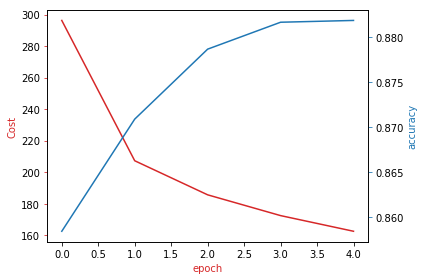

In [22]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [23]:
acc = max(accuracy_list)
print("Accuracy : ",acc*100,"%")

Accuracy :  88.19 %
